In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de la tabla de datos 

In [117]:
data = pd.read_csv("AB_NYC_2019.csv", header="infer", sep=",")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Estadísticas generales

In [118]:
print("Estadísticas Generales del Dataset:")
print(data.describe())

Estadísticas Generales del Dataset:
                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   


# Verificar valores nulos en cada columna

In [119]:
print("Valores nulos por columna:")
print(data.isnull().sum())

Valores nulos por columna:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


### Gráfico de barras para valores nulos por columna

C:\Users\carol\AppData\Local\Temp\ipykernel_103456\3625365866.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_counts.index, y=null_counts.values, palette="viridis")


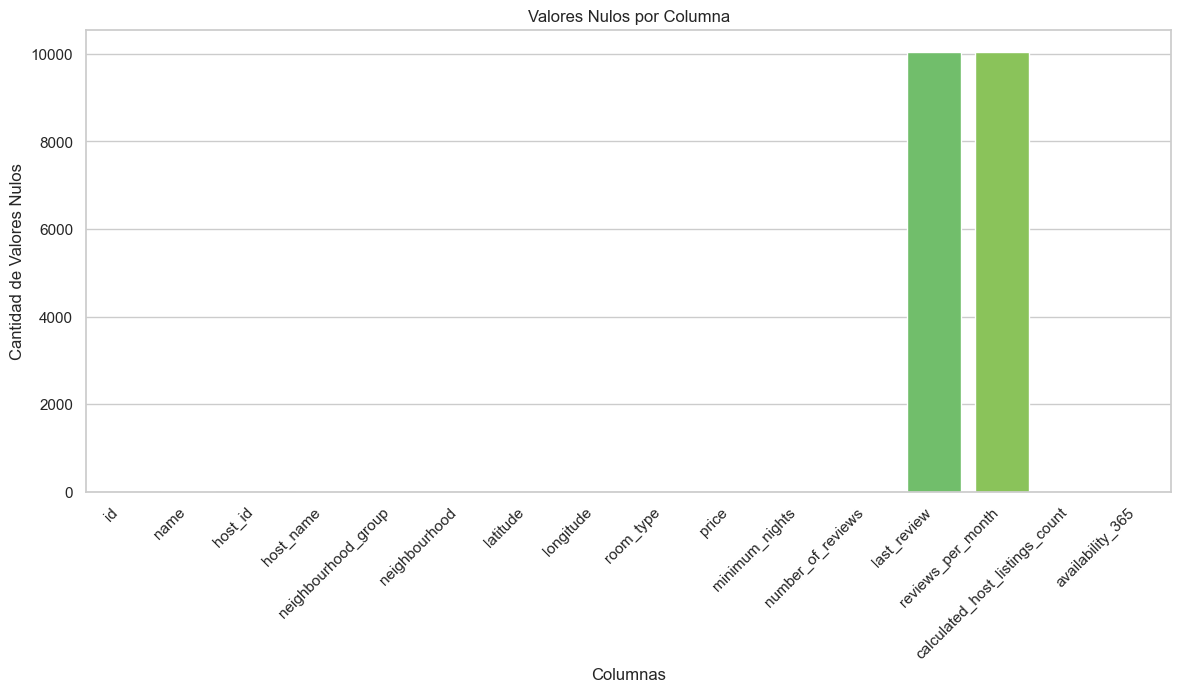

In [120]:
plt.figure(figsize=(14, 6))
null_counts = data.isnull().sum()
sns.barplot(x=null_counts.index, y=null_counts.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title("Valores Nulos por Columna")
plt.xlabel("Columnas")
plt.ylabel("Cantidad de Valores Nulos")
plt.show()


### Llenar valores nulos en columnas específicas

In [121]:
data['name'].fillna('Unknown', inplace=True)
data['host_name'].fillna('Unknown', inplace=True)
data['reviews_per_month'].fillna(0, inplace=True)

C:\Users\carol\AppData\Local\Temp\ipykernel_103456\4076936384.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['name'].fillna('Unknown', inplace=True)
C:\Users\carol\AppData\Local\Temp\ipykernel_103456\4076936384.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

1. `data['name'].fillna('Unknown', inplace=True)`:
Llena los valores nulos en la columna name con el texto "Unknown".
Esto es útil cuando faltan nombres en algunos registros, permitiendo que el análisis o modelado no se vea afectado por valores faltantes en esta columna.

2. `data['host_name'].fillna('Unknown', inplace=True)`:
Llena los valores nulos en la columna host_name con "Unknown".
De forma similar, esto cubre la falta de nombres de anfitriones, para que no haya valores nulos en esta columna que puedan afectar el análisis.

3. `data['reviews_per_month'].fillna(0, inplace=True)`:
Llena los valores nulos en la columna reviews_per_month con 0.
Esto es útil si los valores nulos indican que un listado no tiene reseñas. Al usar 0, se asume que no hay actividad de reseñas para esos listados, evitando problemas en análisis numéricos.

### Comprobación 

C:\Users\carol\AppData\Local\Temp\ipykernel_103456\4167732086.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_counts.index, y=null_counts.values, palette="viridis")


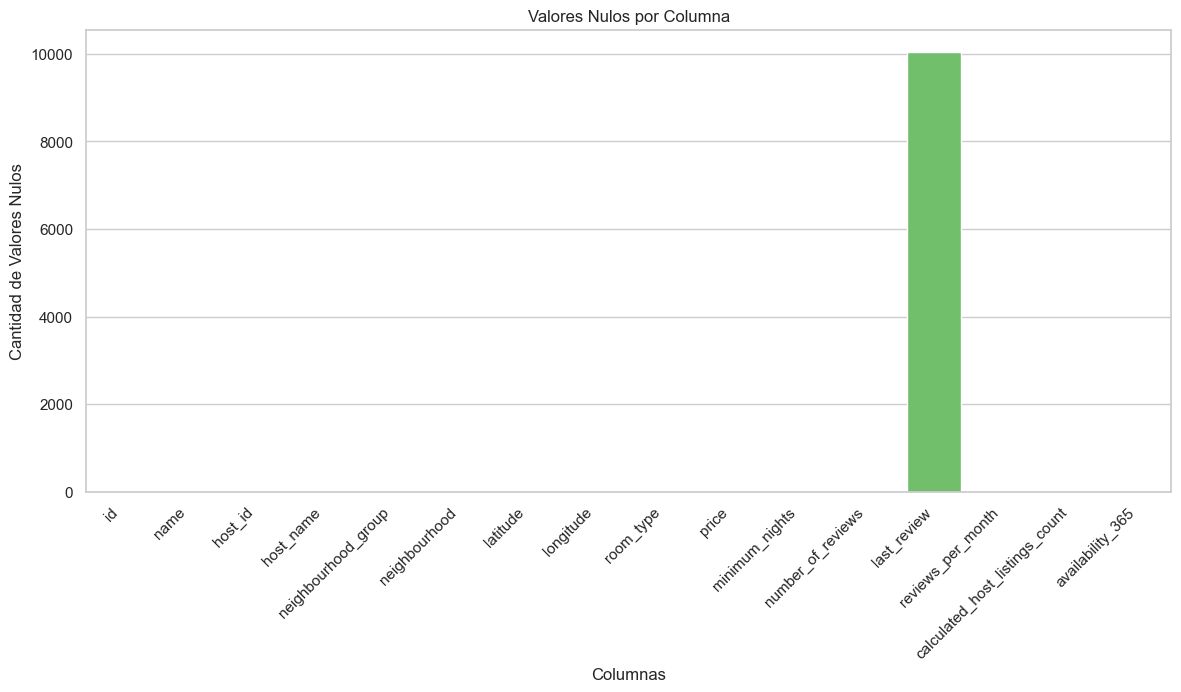

In [122]:
plt.figure(figsize=(14, 6))
null_counts = data.isnull().sum()
sns.barplot(x=null_counts.index, y=null_counts.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title("Valores Nulos por Columna")
plt.xlabel("Columnas")
plt.ylabel("Cantidad de Valores Nulos")
plt.show()

# Obtener el tipo de datos y visualizar una muestra de 'last_review' para confirmar si es texto

In [123]:
print("\nTipo de datos antes de la conversión de 'last_review':")
print(data['last_review'].dtype)
print(data['last_review'].head())


Tipo de datos antes de la conversión de 'last_review':
object
0    2018-10-19
1    2019-05-21
2           NaN
3    2019-07-05
4    2018-11-19
Name: last_review, dtype: object


### Convertir la columna 'last_review' a formato de fecha

In [124]:
data['last_review'] = pd.to_datetime(data['last_review'], errors='coerce')

### Comprobación

In [125]:
print("\nTipo de datos antes de la conversión de 'last_review':")
print(data['last_review'].dtype)
print(data['last_review'].head())


Tipo de datos antes de la conversión de 'last_review':
datetime64[ns]
0   2018-10-19
1   2019-05-21
2          NaT
3   2019-07-05
4   2018-11-19
Name: last_review, dtype: datetime64[ns]


# Estadísticas básicas de la columna 'price' para identificar precios extremos

In [126]:
print("\nEstadísticas de 'price':")
print(data['price'].describe())


Estadísticas de 'price':
count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


Text(0, 0.5, 'Frecuencia')

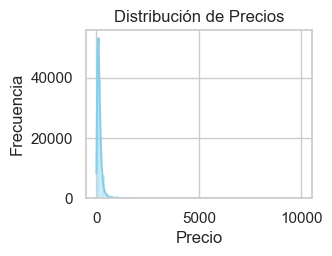

In [127]:
plt.subplot(2, 2, 2)
sns.histplot(data['price'], bins=50, color="skyblue", kde=True)
plt.title("Distribución de Precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")



Text(0.5, 0, 'Precio')

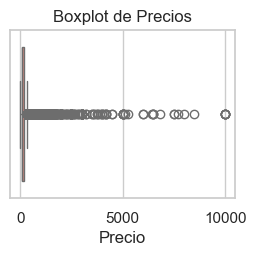

In [128]:
plt.subplot(2, 2, 3)
sns.boxplot(x=data['price'], color="salmon")
plt.title("Boxplot de Precios")
plt.xlabel("Precio")

### Filtrar valores atípicos en la columna 'price'
### Eliminamos registros cuyo precio es mayor al percentil 99 (umbral de precios extremos)

In [129]:
price_threshold = data['price'].quantile(0.99)
data_cleaned = data[data['price'] <= price_threshold]

### Comprobación

In [130]:
print(data_cleaned['price'].describe())

count    48421.000000
mean       137.543917
std        103.789003
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max        799.000000
Name: price, dtype: float64


# Verificar duplicados en las columnas 'id' y 'name'

In [131]:
print("\nNúmero de duplicados en 'id':", data['id'].duplicated().sum())
print("Número de duplicados en 'name':", data['name'].duplicated().sum())


Número de duplicados en 'id': 0
Número de duplicados en 'name': 989


Text(0, 0.5, 'Cantidad de nombres')

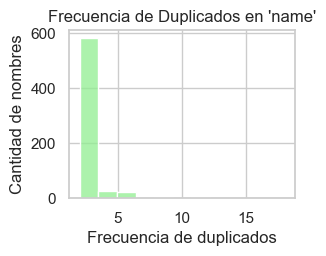

In [132]:
duplicate_names_count = data['name'].value_counts()
duplicate_names_count = duplicate_names_count[duplicate_names_count > 1]

plt.subplot(2, 2, 4)
sns.histplot(duplicate_names_count, kde=False, color="lightgreen")
plt.title("Frecuencia de Duplicados en 'name'")
plt.xlabel("Frecuencia de duplicados")
plt.ylabel("Cantidad de nombres")


### Eliminar duplicados en la columna 'name'
### Retenemos solo el primer registro de cada nombre duplicado

In [133]:
data_cleaned.drop_duplicates(subset='name', keep='first', inplace=True)

C:\Users\carol\AppData\Local\Temp\ipykernel_103456\3251435513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.drop_duplicates(subset='name', keep='first', inplace=True)


In [108]:
print("Número de duplicados en 'name':", data_cleaned['name'].duplicated().sum())

Número de duplicados en 'name': 0


# Describir la columna 'availability_365' para revisar su distribución


In [134]:
print("\nDistribución de 'availability_365':")
print(data['availability_365'].describe())


Distribución de 'availability_365':
count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64


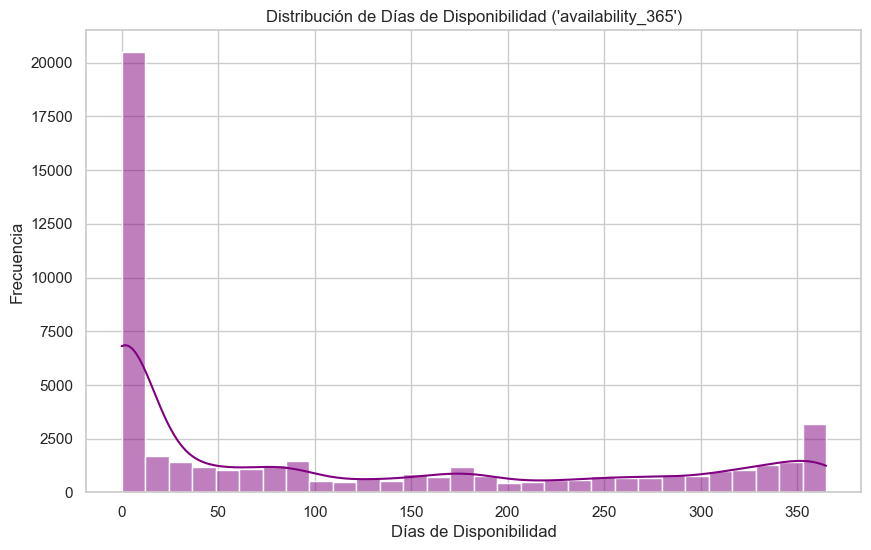

In [135]:
plt.figure(figsize=(10, 6))
sns.histplot(data['availability_365'], bins=30, color="purple", kde=True)
plt.title("Distribución de Días de Disponibilidad ('availability_365')")
plt.xlabel("Días de Disponibilidad")
plt.ylabel("Frecuencia")
plt.show()


### Contar la cantidad de registros con 'availability_365' igual a 0 para fines de análisis


In [136]:
availability_zero_count = data[data['availability_365'] == 0].shape[0]
print(f"\nCantidad de registros con 'availability_365' igual a 0: {availability_zero_count}")


Cantidad de registros con 'availability_365' igual a 0: 17533


### Se creo una variable dummy para mejor utilización de manera que sea más fácil filtrar o analizar específicamente las propiedades no disponibles.

In [137]:
data_cleaned['is_available'] = data_cleaned['availability_365'] > 0
availability_zero_count = data_cleaned[data_cleaned['is_available'] == 0].shape[0]
print(f"\nCantidad de registros con 'availability_365' igual a 0: {availability_zero_count}")



Cantidad de registros con 'availability_365' igual a 0: 17044


C:\Users\carol\AppData\Local\Temp\ipykernel_103456\2941554491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['is_available'] = data_cleaned['availability_365'] > 0


C:\Users\carol\AppData\Local\Temp\ipykernel_103456\2805048125.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=availability_counts.index, y=availability_counts.values, palette="viridis")


Text(0.5, 1.0, "Disponibilidad de Propiedades según 'availability_365'")

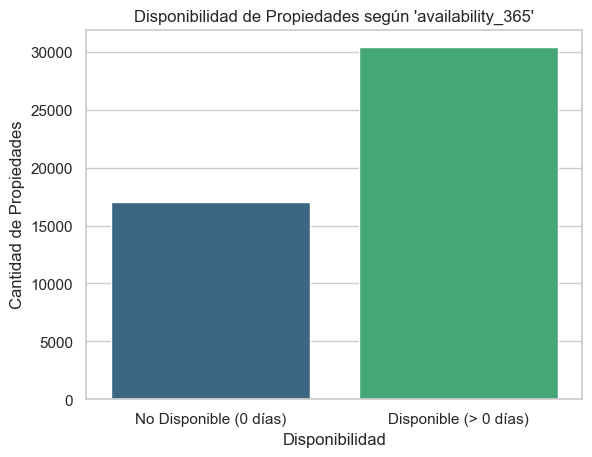

In [139]:
availability_counts = data_cleaned['is_available'].value_counts()
sns.barplot(x=availability_counts.index, y=availability_counts.values, palette="viridis")
plt.xticks([0, 1], ['No Disponible (0 días)', 'Disponible (> 0 días)'])
plt.xlabel("Disponibilidad")
plt.ylabel("Cantidad de Propiedades")
plt.title("Disponibilidad de Propiedades según 'availability_365'")



# Dataset limpio

In [140]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47439 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              47439 non-null  int64         
 1   name                            47439 non-null  object        
 2   host_id                         47439 non-null  int64         
 3   host_name                       47439 non-null  object        
 4   neighbourhood_group             47439 non-null  object        
 5   neighbourhood                   47439 non-null  object        
 6   latitude                        47439 non-null  float64       
 7   longitude                       47439 non-null  float64       
 8   room_type                       47439 non-null  object        
 9   price                           47439 non-null  int64         
 10  minimum_nights                  47439 non-null  int64         
 11  number_